#### Feature Columns
    
* id - Unique ID for each home sold
* date - Date of the home sale
* price - Price of each home sold
* bedrooms - Number of bedrooms
* bathrooms - Number of bathrooms, where .5 accounts for a room with a toilet but no shower
* sqft_living - Square footage of the apartments interior living space
* sqft_lot - Square footage of the land space
* floors - Number of floors
* waterfront - A dummy variable for whether the apartment was overlooking the waterfront or not
* view - An index from 0 to 4 of how good the view of the property was
* condition - An index from 1 to 5 on the condition of the apartment,
* grade - An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design.
* sqft_above - The square footage of the interior housing space that is above ground level
* sqft_basement - The square footage of the interior housing space that is below ground level
* yr_built - The year the house was initially built
* yr_renovated - The year of the house’s last renovation
* zipcode - What zipcode area the house is in
* lat - Lattitude
* long - Longitude
* sqft_living15 - The square footage of interior housing living space for the nearest 15 neighbors
* sqft_lot15 - The square footage of the land lots of the nearest 15 neighbors

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('../DATA/kc_house_data.csv')

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  int64  
 9   view           21597 non-null  int64  
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  int64  
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  int64  
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [5]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,84.464787,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,401.821438,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


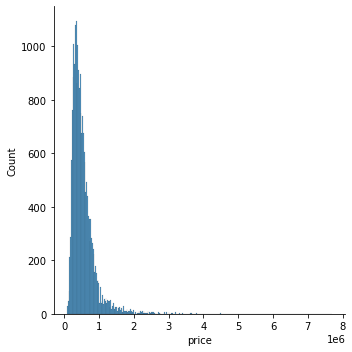

In [12]:
sns.displot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

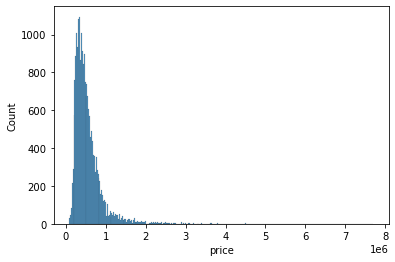

In [13]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='bedrooms', ylabel='count'>

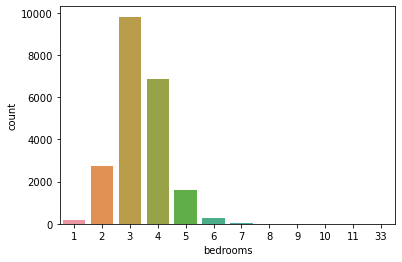

In [15]:
sns.countplot(x=df['bedrooms'])

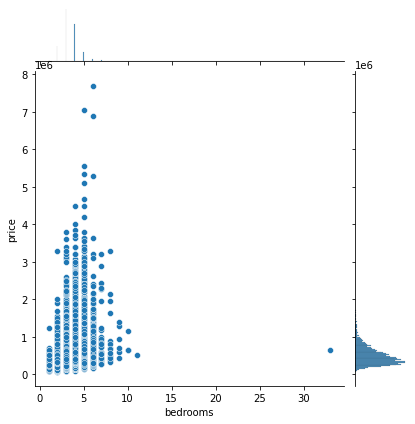

In [16]:
sns.jointplot(x=df['bedrooms'], y=df['price'])

In [19]:
df.corr()['price'].sort_values()

zipcode         -0.053402
id              -0.016772
long             0.022036
condition        0.036056
yr_built         0.053953
sqft_lot15       0.082845
sqft_lot         0.089876
yr_renovated     0.126424
floors           0.256804
waterfront       0.266398
lat              0.306692
bedrooms         0.308787
sqft_basement    0.323799
view             0.397370
bathrooms        0.525906
sqft_living15    0.585241
sqft_above       0.605368
grade            0.667951
sqft_living      0.701917
price            1.000000
Name: price, dtype: float64

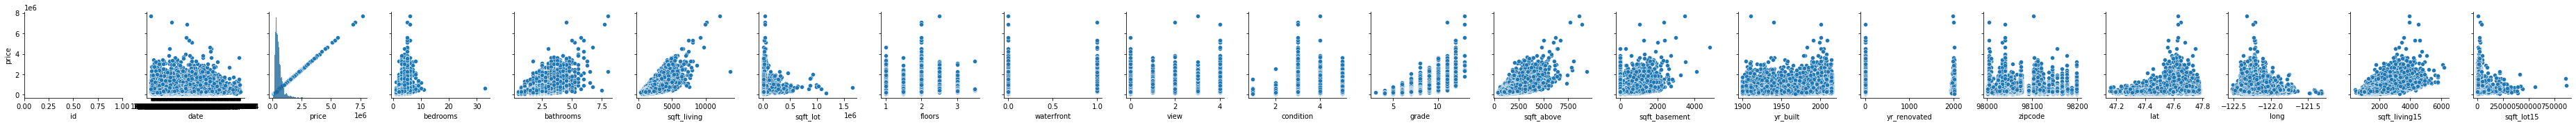

In [32]:
sns.pairplot(df, y_vars=['price'], x_vars=df.columns)

<AxesSubplot:xlabel='price', ylabel='sqft_living'>

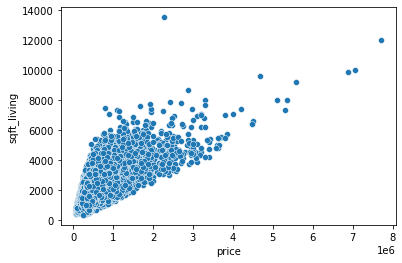

In [35]:
sns.scatterplot(data=df, x='price', y='sqft_living')

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

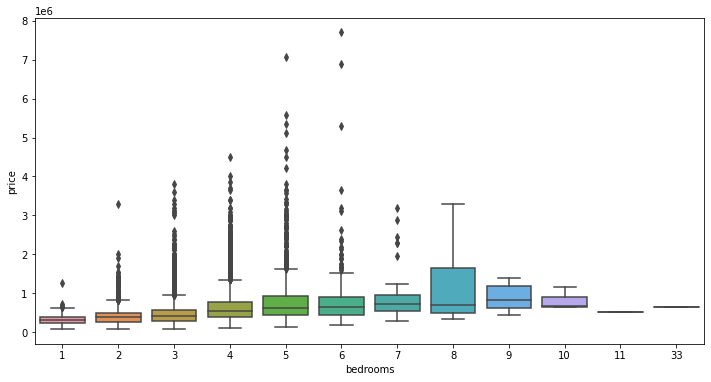

In [37]:
plt.figure(figsize=(12,6))
sns.boxplot(x='bedrooms', y='price', data=df)

<AxesSubplot:xlabel='long', ylabel='price'>

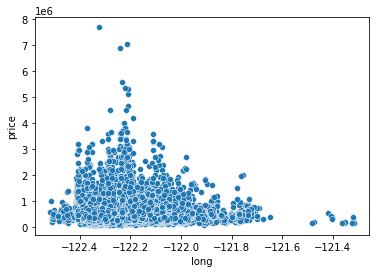

In [39]:
sns.scatterplot(data=df, x='long', y='price')

<AxesSubplot:xlabel='lat', ylabel='price'>

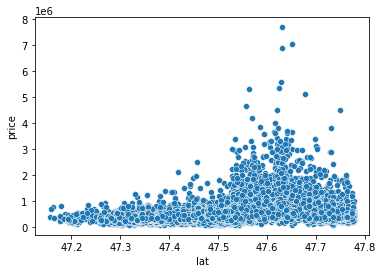

In [40]:
sns.scatterplot(data=df, x='lat', y='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

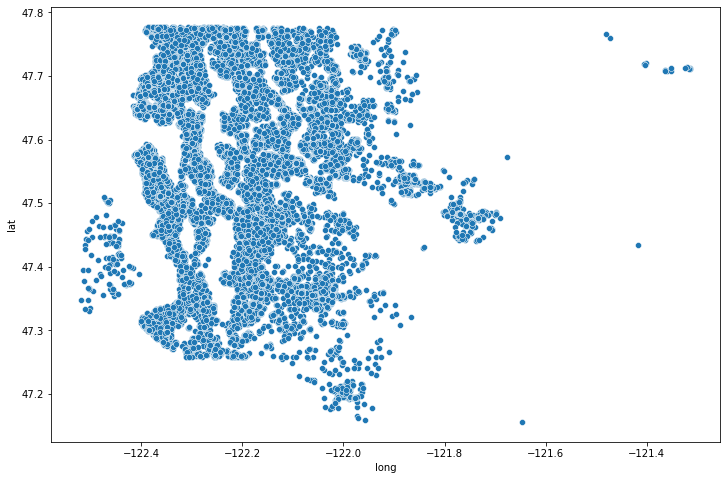

In [48]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=df, x='long', y='lat')

<AxesSubplot:xlabel='long', ylabel='lat'>

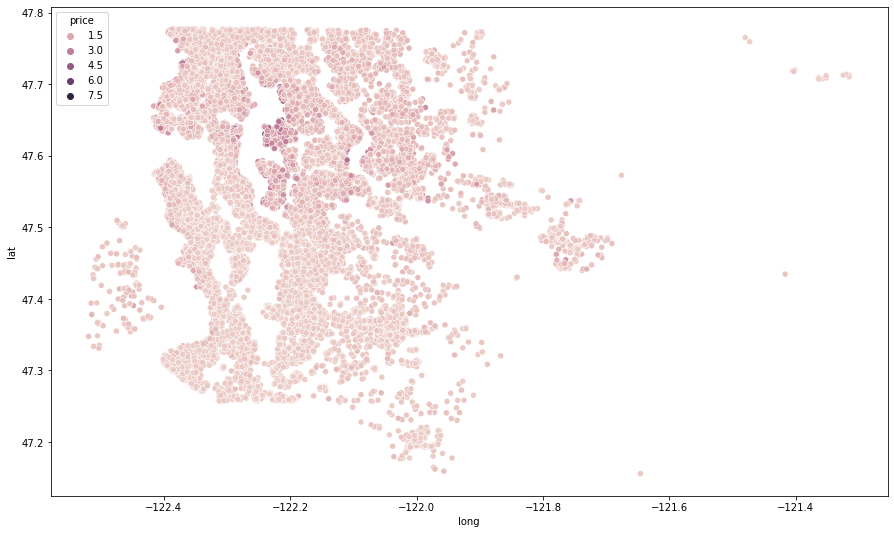

In [51]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=df, x='long', y='lat', hue='price')

In [53]:
df.sort_values('price', ascending=False).head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7245,6762700020,10/13/2014,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3910,9808700762,6/11/2014,7060000.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9245,9208900037,9/19/2014,6890000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4407,2470100110,8/4/2014,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1446,8907500070,4/13/2015,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
1313,7558700030,4/13/2015,5300000.0,6,6.00,7390,24829,2.0,1,4,...,12,5000,2390,1991,0,98040,47.5631,-122.210,4320,24619
1162,1247600105,10/20/2014,5110000.0,5,5.25,8010,45517,2.0,1,4,...,12,5990,2020,1999,0,98033,47.6767,-122.211,3430,26788
8085,1924059029,6/17/2014,4670000.0,5,6.75,9640,13068,1.0,1,4,...,12,4820,4820,1983,2009,98040,47.5570,-122.210,3270,10454
2624,7738500731,8/15/2014,4500000.0,5,5.50,6640,40014,2.0,1,4,...,12,6350,290,2004,0,98155,47.7493,-122.280,3030,23408
8629,3835500195,6/18/2014,4490000.0,4,3.00,6430,27517,2.0,0,0,...,12,6430,0,2001,0,98004,47.6208,-122.219,3720,14592


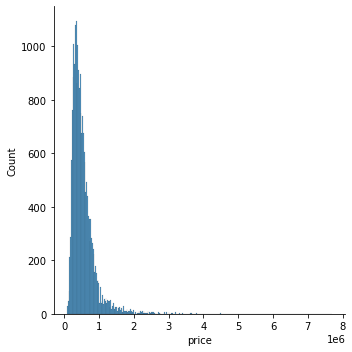

In [54]:
sns.displot(df['price'])

In [58]:
len(df)*0.01

215.97

In [59]:
bottom_99_perc = df.sort_values('price', ascending=False).iloc[216:]

In [60]:
less_than_3m = df[df['price'] < 3000000]

In [61]:
len(less_than_3m)

21546

In [62]:
len(bottom_99_perc)

21381

<AxesSubplot:xlabel='long', ylabel='lat'>

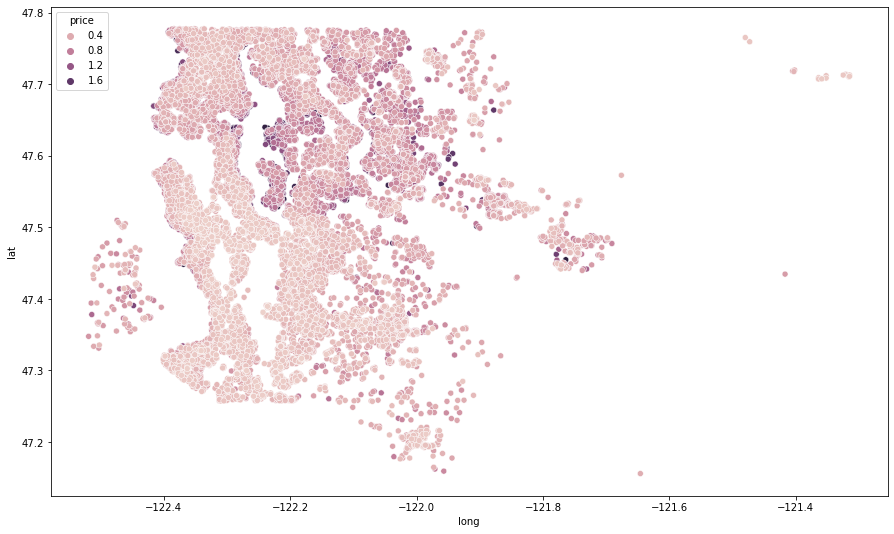

In [63]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=bottom_99_perc, x='long', y='lat', hue='price')

<AxesSubplot:xlabel='long', ylabel='lat'>

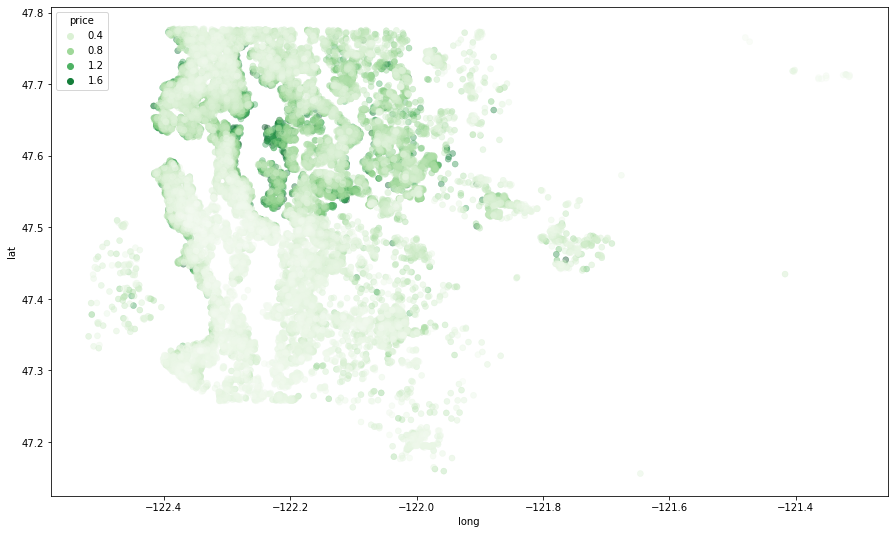

In [76]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=bottom_99_perc, x='long', y='lat', hue='price', edgecolor=None, alpha=0.4, palette='Greens')

<AxesSubplot:xlabel='waterfront', ylabel='price'>

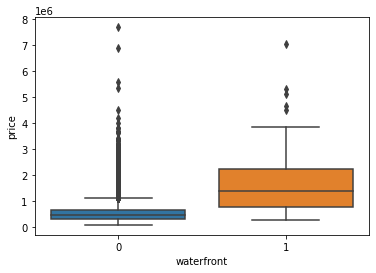

In [77]:
sns.boxplot(data=df, x='waterfront', y='price')

Feature Engeneering

In [78]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [79]:
df = df.drop('id', axis=1)

In [80]:
df['date']

0        10/13/2014
1         12/9/2014
2         2/25/2015
3         12/9/2014
4         2/18/2015
            ...    
21592     5/21/2014
21593     2/23/2015
21594     6/23/2014
21595     1/16/2015
21596    10/15/2014
Name: date, Length: 21597, dtype: object

In [81]:
df['date'] = pd.to_datetime(df['date'])

In [82]:
df['date']

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21592   2014-05-21
21593   2015-02-23
21594   2014-06-23
21595   2015-01-16
21596   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

In [83]:
df['year'] = df['date'].apply(lambda x: x.year)
df['month'] = df['date'].apply(lambda x: x.month)

In [84]:
df[['date', 'year', 'month']]

,date,year,month
0,2014-10-13,2014,10
1,2014-12-09,2014,12
2,2015-02-25,2015,2
3,2014-12-09,2014,12
4,2015-02-18,2015,2
...,...,...,...
21592,2014-05-21,2014,5
21593,2015-02-23,2015,2
21594,2014-06-23,2014,6
21595,2015-01-16,2015,1


In [85]:
df.drop('date', axis=1, inplace=True)

<AxesSubplot:xlabel='month', ylabel='price'>

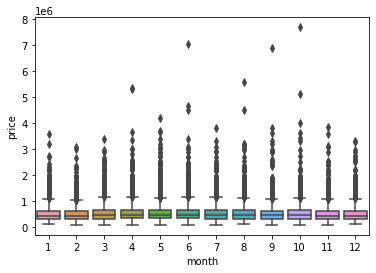

In [86]:
sns.boxplot(x='month', y='price', data=df)

<AxesSubplot:xlabel='month'>

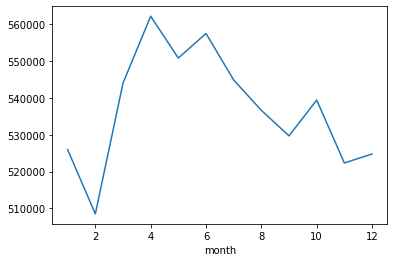

In [88]:
df.groupby('month').mean()['price'].plot()

<AxesSubplot:xlabel='year'>

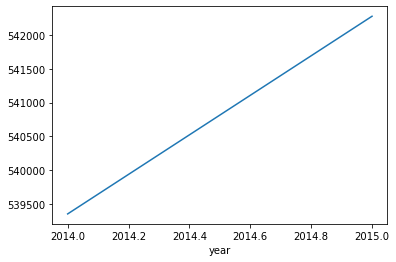

In [89]:
df.groupby('year').mean()['price'].plot()

In [90]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [91]:
df['zipcode'].value_counts().

98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

<AxesSubplot:xlabel='long', ylabel='lat'>

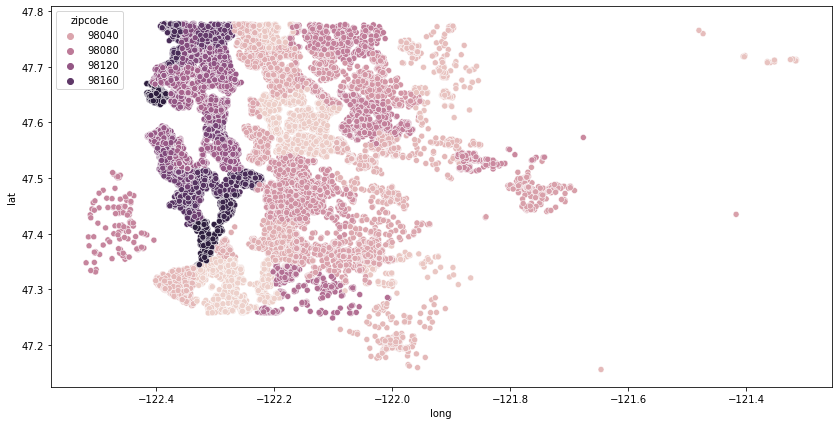

In [101]:
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='long', y='lat', hue='zipcode')

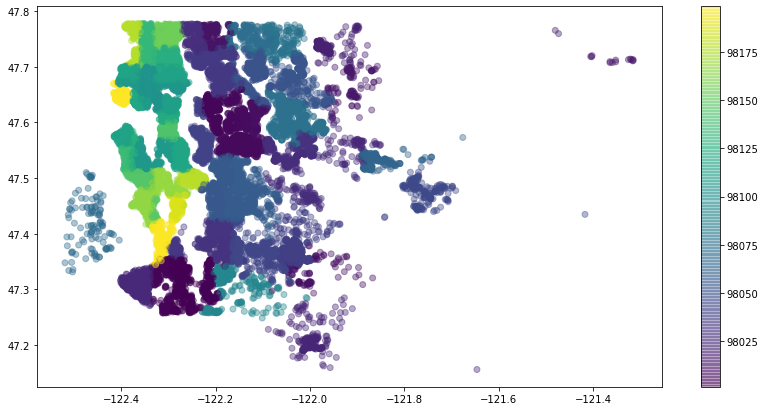

In [99]:
plt.figure(figsize=(14,7))
plt.scatter(data=df, x='long', y='lat', c='zipcode', alpha=0.4)
plt.colorbar()

<AxesSubplot:xlabel='zipcode', ylabel='price'>

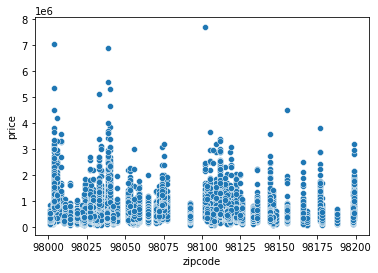

In [107]:
sns.scatterplot(data=df, x='zipcode', y='price')

<AxesSubplot:xlabel='zipcode', ylabel='Count'>

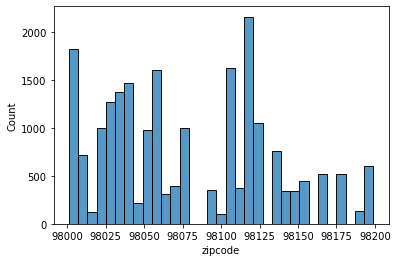

In [105]:
sns.histplot(df['zipcode'])

In [108]:
df = df.drop('zipcode', axis=1)

In [110]:
df['yr_renovated'].value_counts()

0       20683
2014       91
2013       37
2003       36
2000       35
        ...  
1934        1
1959        1
1951        1
1948        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

Maybe split them by binary category 'renovated' but its relationship with price should be proportional so 0 value should indicate lowerr price and most recent renovation, higher price. No reason to change it therefore.

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

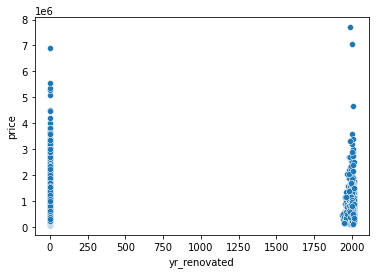

In [112]:
sns.scatterplot(data=df, x='yr_renovated', y='price')

Hmmm...the relaiton is not so obvious. 

In [113]:
df['sqft_basement'].value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

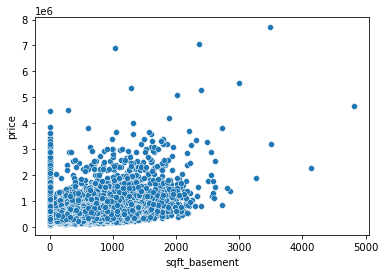

In [114]:
sns.scatterplot(data=df, x='sqft_basement', y='price')

'year renovated' need some feature eng. Setting 0 'yr_renovated' to its 'yr_build' should remain true and retain all the information and actually present it in a more accurate way.

In [119]:
df[['yr_renovated', 'yr_built']].value_counts()

yr_renovated  yr_built
0             2014        559
              2006        453
              2005        450
              2004        433
              2003        419
                         ... 
2015          1964          1
1994          1904          1
              1903          1
1993          1978          1
2015          1968          1
Length: 862, dtype: int64

In [120]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21597 non-null  float64
 1   bedrooms       21597 non-null  int64  
 2   bathrooms      21597 non-null  float64
 3   sqft_living    21597 non-null  int64  
 4   sqft_lot       21597 non-null  int64  
 5   floors         21597 non-null  float64
 6   waterfront     21597 non-null  int64  
 7   view           21597 non-null  int64  
 8   condition      21597 non-null  int64  
 9   grade          21597 non-null  int64  
 10  sqft_above     21597 non-null  int64  
 11  sqft_basement  21597 non-null  int64  
 12  yr_built       21597 non-null  int64  
 13  yr_renovated   21597 non-null  int64  
 14  lat            21597 non-null  float64
 15  long           21597 non-null  float64
 16  sqft_living15  21597 non-null  int64  
 17  sqft_lot15     21597 non-null  int64  
 18  year  

In [137]:
df[df['yr_renovated'] == 0]['yr_renovated'] = df[df['yr_renovated'] == 0]['yr_built']

In [ ]:
#problem as df['']creates a slice/view and not retrieves info. Use .loc instead

In [132]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated']

0        0
2        0
3        0
4        0
5        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: yr_renovated, Length: 20683, dtype: int64

In [131]:
df.loc[df['yr_renovated'] == 0, 'yr_built']

0        1955
2        1933
3        1965
4        1987
5        2001
         ... 
21592    2009
21593    2014
21594    2009
21595    2004
21596    2008
Name: yr_built, Length: 20683, dtype: int64

In [133]:
df.loc[df['yr_renovated'] == 0, 'yr_renovated'] = df.loc[df['yr_renovated'] == 0, 'yr_built']

In [138]:
df['yr_renovated'].value_counts()

2014    650
2005    485
2006    477
2004    459
2003    455
       ... 
1901     28
1902     25
1933     23
1935     19
1934     14
Name: yr_renovated, Length: 116, dtype: int64

<AxesSubplot:xlabel='yr_renovated', ylabel='price'>

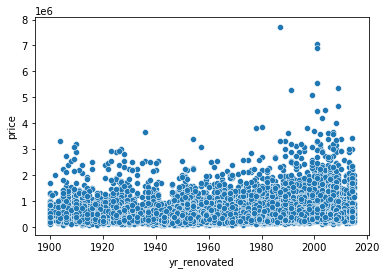

In [142]:
sns.scatterplot(data=df, x='yr_renovated', y='price')

Preprocessing and building a Model

In [143]:
X = df.drop('price', axis=1).values
y = df['price'].values

In [144]:
from sklearn.model_selection import train_test_split

In [145]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [146]:
from sklearn.preprocessing import MinMaxScaler

In [147]:
scaler = MinMaxScaler()

In [148]:
X_train = scaler.fit_transform(X_train)

In [149]:
X_test = scaler.transform(X_test)

In [150]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [151]:
X_train.shape

(15117, 19)

In [153]:
model = Sequential()

model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))
model.add(Dense(19, activation='relu'))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [154]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=128, epochs=400)

Epoch 1/400
119/119 [==============================] - 1s 3ms/step - loss: 424947209830.4000 - val_loss: 420081238016.0000
Epoch 2/400
119/119 [==============================] - 0s 1ms/step - loss: 431978496000.0000 - val_loss: 416170475520.0000
Epoch 3/400
119/119 [==============================] - 0s 1ms/step - loss: 435494965521.0667 - val_loss: 379635335168.0000
Epoch 4/400
119/119 [==============================] - 0s 1ms/step - loss: 384732064426.6667 - val_loss: 254978408448.0000
Epoch 5/400
119/119 [==============================] - 0s 1ms/step - loss: 213066425002.6667 - val_loss: 119828078592.0000
Epoch 6/400
119/119 [==============================] - 0s 1ms/step - loss: 104694785638.4000 - val_loss: 102521643008.0000
Epoch 7/400
119/119 [==============================] - 0s 1ms/step - loss: 97543271697.0667 - val_loss: 100904026112.0000
Epoch 8/400
119/119 [==============================] - 0s 1ms/step - loss: 98301588684.8000 - val_loss: 98982633472.0000
Epoch 9/400
119/119

Epoch 68/400
119/119 [==============================] - 0s 1ms/step - loss: 40824048435.2000 - val_loss: 41703120896.0000
Epoch 69/400
119/119 [==============================] - 0s 1ms/step - loss: 41153444864.0000 - val_loss: 41576865792.0000
Epoch 70/400
119/119 [==============================] - 0s 1ms/step - loss: 41220375108.2667 - val_loss: 41494151168.0000
Epoch 71/400
119/119 [==============================] - 0s 1ms/step - loss: 38926794325.3333 - val_loss: 41388314624.0000
Epoch 72/400
119/119 [==============================] - 0s 1ms/step - loss: 38953241992.5333 - val_loss: 41300344832.0000
Epoch 73/400
119/119 [==============================] - 0s 1ms/step - loss: 43490338030.9333 - val_loss: 41203331072.0000
Epoch 74/400
119/119 [==============================] - 0s 1ms/step - loss: 38476169267.2000 - val_loss: 41110671360.0000
Epoch 75/400
119/119 [==============================] - 0s 1ms/step - loss: 39960809728.0000 - val_loss: 41023905792.0000
Epoch 76/400
119/119 [==

Epoch 135/400
119/119 [==============================] - 0s 1ms/step - loss: 34108279261.8667 - val_loss: 35545735168.0000
Epoch 136/400
119/119 [==============================] - 0s 1ms/step - loss: 33728781465.6000 - val_loss: 35530088448.0000
Epoch 137/400
119/119 [==============================] - 0s 1ms/step - loss: 35063865361.0667 - val_loss: 35428704256.0000
Epoch 138/400
119/119 [==============================] - 0s 1ms/step - loss: 35072723404.8000 - val_loss: 35381702656.0000
Epoch 139/400
119/119 [==============================] - 0s 1ms/step - loss: 32938542574.9333 - val_loss: 35398070272.0000
Epoch 140/400
119/119 [==============================] - 0s 1ms/step - loss: 32294797038.9333 - val_loss: 35324477440.0000
Epoch 141/400
119/119 [==============================] - 0s 1ms/step - loss: 33157239364.2667 - val_loss: 35265282048.0000
Epoch 142/400
119/119 [==============================] - 0s 1ms/step - loss: 33458330811.7333 - val_loss: 35171647488.0000
Epoch 143/400
11

119/119 [==============================] - 0s 1ms/step - loss: 31617254912.0000 - val_loss: 33736943616.0000
Epoch 202/400
119/119 [==============================] - 0s 1ms/step - loss: 32213699925.3333 - val_loss: 33732003840.0000
Epoch 203/400
119/119 [==============================] - 0s 1ms/step - loss: 30983595980.8000 - val_loss: 33672366080.0000
Epoch 204/400
119/119 [==============================] - 0s 1ms/step - loss: 30589344221.8667 - val_loss: 33711452160.0000
Epoch 205/400
119/119 [==============================] - 0s 1ms/step - loss: 32870317653.3333 - val_loss: 33671911424.0000
Epoch 206/400
119/119 [==============================] - 0s 1ms/step - loss: 30471939037.8667 - val_loss: 33627697152.0000
Epoch 207/400
119/119 [==============================] - 0s 1ms/step - loss: 31526686702.9333 - val_loss: 33600659456.0000
Epoch 208/400
119/119 [==============================] - 0s 1ms/step - loss: 32775021721.6000 - val_loss: 33603287040.0000
Epoch 209/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 32239747174.4000 - val_loss: 32873467904.0000
Epoch 268/400
119/119 [==============================] - 0s 1ms/step - loss: 29289450427.7333 - val_loss: 32871139328.0000
Epoch 269/400
119/119 [==============================] - 0s 1ms/step - loss: 31391849625.6000 - val_loss: 32859033600.0000
Epoch 270/400
119/119 [==============================] - 0s 1ms/step - loss: 31155653188.2667 - val_loss: 32858767360.0000
Epoch 271/400
119/119 [==============================] - 0s 1ms/step - loss: 30565811046.4000 - val_loss: 32838811648.0000
Epoch 272/400
119/119 [==============================] - 0s 1ms/step - loss: 30377890491.7333 - val_loss: 32885772288.0000
Epoch 273/400
119/119 [==============================] - 0s 1ms/step - loss: 31588915046.4000 - val_loss: 32840433664.0000
Epoch 274/400
119/119 [==============================] - 0s 1ms/step - loss: 31218463505.0667 - val_loss: 32842233856.0000
Epoch 275/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 30394644275.2000 - val_loss: 32343328768.0000
Epoch 334/400
119/119 [==============================] - 0s 1ms/step - loss: 30543554048.0000 - val_loss: 32336029696.0000
Epoch 335/400
119/119 [==============================] - 0s 1ms/step - loss: 30622898722.1333 - val_loss: 32364789760.0000
Epoch 336/400
119/119 [==============================] - 0s 1ms/step - loss: 29257413649.0667 - val_loss: 32304123904.0000
Epoch 337/400
119/119 [==============================] - 0s 1ms/step - loss: 31073860386.1333 - val_loss: 32310310912.0000
Epoch 338/400
119/119 [==============================] - 0s 1ms/step - loss: 30282529501.8667 - val_loss: 32346980352.0000
Epoch 339/400
119/119 [==============================] - 0s 1ms/step - loss: 29718121403.7333 - val_loss: 32282294272.0000
Epoch 340/400
119/119 [==============================] - 0s 1ms/step - loss: 29884992443.7333 - val_loss: 32264321024.0000
Epoch 341/400
119/119 [=======

119/119 [==============================] - 0s 1ms/step - loss: 29234757077.3333 - val_loss: 31864371200.0000
Epoch 400/400
119/119 [==============================] - 0s 1ms/step - loss: 29688625459.2000 - val_loss: 31832573952.0000


In [155]:
model.history.history

{'loss': [429745373184.0,
  428644106240.0,
  412671410176.0,
  334845018112.0,
  184131305472.0,
  108418859008.0,
  103074209792.0,
  101134344192.0,
  99074572288.0,
  96925556736.0,
  94516789248.0,
  92069568512.0,
  89480257536.0,
  86674538496.0,
  83618553856.0,
  80346603520.0,
  76897943552.0,
  73173467136.0,
  69389295616.0,
  65577271296.0,
  61785571328.0,
  58463240192.0,
  55610781696.0,
  53309059072.0,
  51622195200.0,
  50381946880.0,
  49497034752.0,
  48812081152.0,
  48187564032.0,
  47654719488.0,
  47233589248.0,
  46849073152.0,
  46393344000.0,
  46091653120.0,
  45722632192.0,
  45413867520.0,
  45066334208.0,
  44776058880.0,
  44518137856.0,
  44248662016.0,
  43972313088.0,
  43780345856.0,
  43518623744.0,
  43328774144.0,
  43112198144.0,
  42928312320.0,
  42701807616.0,
  42550243328.0,
  42338025472.0,
  42214436864.0,
  42031857664.0,
  41828978688.0,
  41678807040.0,
  41563262976.0,
  41418338304.0,
  41354481664.0,
  41138421760.0,
  41050722304.0

In [157]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

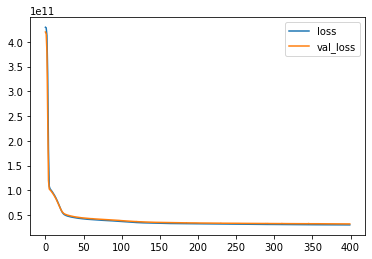

In [158]:
losses.plot()

In [159]:
#Could I compare 2 models with different amount of epochs? I want to see how far is to far, when will it overfit?

In [160]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, explained_variance_score

In [161]:
predictions = model.predict(X_test)

In [162]:
mean_squared_error(y_test, predictions)

31832574572.364063

In [163]:
mean_squared_error(y_test, predictions)**0.5

178416.8561889937

In [164]:
np.sqrt(mean_squared_error(y_test, predictions))

178416.8561889937

In [165]:
mean_absolute_error(y_test, predictions)

108975.15687738113

In [166]:
df['price'].describe()

count    2.159700e+04
mean     5.402966e+05
std      3.673681e+05
min      7.800000e+04
25%      3.220000e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64

In [167]:
df['price'].describe()['mean']

540296.5735055795

In [169]:
100*mean_absolute_error(y_test, predictions)/df['price'].describe()['mean']

20.169507307870383

In [170]:
#We are off by +/-20%...thats a lot

In [171]:
explained_variance_score(y_test, predictions)

0.7599589560164186

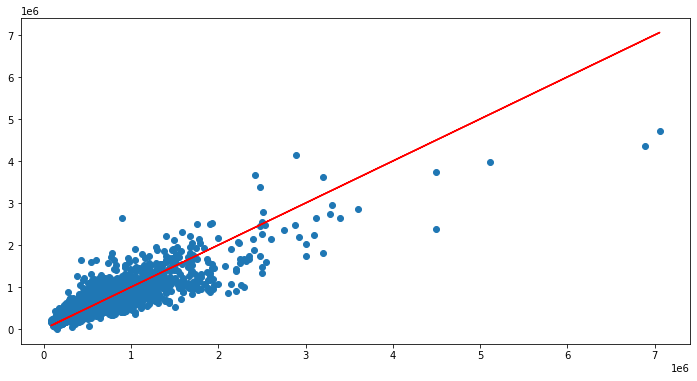

In [186]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test, 'r')

In [176]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650,2014,10
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,1933,47.7379,-122.233,2720,8062,2015,2
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,1965,47.5208,-122.393,1360,5000,2014,12
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,1987,47.6168,-122.045,1800,7503,2015,2


In [179]:
single_house = df.drop('price', axis=1).loc[0]
single_house

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated     1955.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [182]:
single_house.values.reshape(-1, 19)

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         1.95500e+03,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01]])

In [183]:
single_house = scaler.transform(single_house.values.reshape(-1, 19))

In [184]:
model.predict(single_house)

array([[291293.06]], dtype=float32)

In [185]:
df.head(1)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,221900.0,3,1.0,1180,5650,1.0,0,0,3,7,1180,0,1955,1955,47.5112,-122.257,1340,5650,2014,10


In [ ]:
#We could cut off top 1% of houses price-wise and fit the model to data with less variance.
#From the graph we can see that possible cutoffs could be at around $2m or at $4M

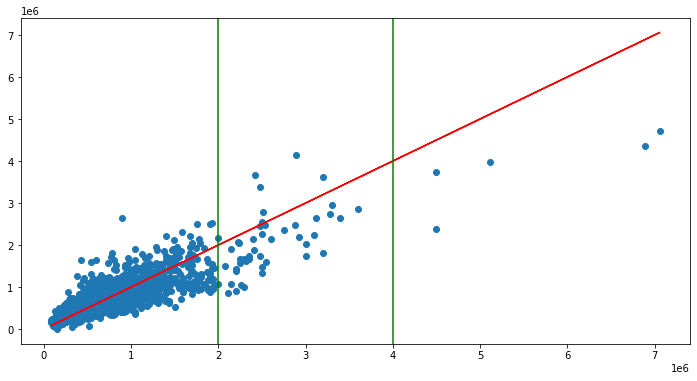

In [193]:
plt.figure(figsize=(12,6))
plt.scatter(y_test, predictions)
plt.plot(y_test,y_test, 'r')
plt.axvline(x=2e+06, c='g')
plt.axvline(x=4e+06, c='g')

<AxesSubplot:xlabel='price', ylabel='Proportion'>

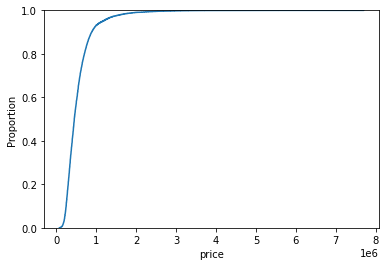

In [198]:
sns.ecdfplot(data=df, x="price")

<AxesSubplot:xlabel='price', ylabel='Count'>

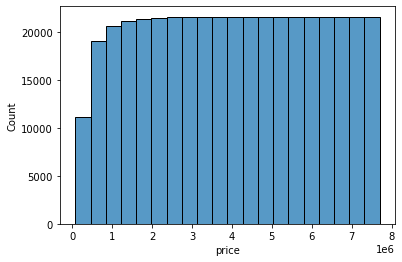

In [201]:
sns.histplot(df['price'], cumulative=True, bins=20)

In [202]:
df['price'].count()

21597

In [225]:
df['price'].count()*0.01

215.97

In [223]:
df['price'].sort_values()

15279      78000.0
465        80000.0
16184      81000.0
8267       82000.0
2139       82500.0
           ...    
1446     5350000.0
4407     5570000.0
9245     6890000.0
3910     7060000.0
7245     7700000.0
Name: price, Length: 21597, dtype: float64

<AxesSubplot:xlabel='price', ylabel='Count'>

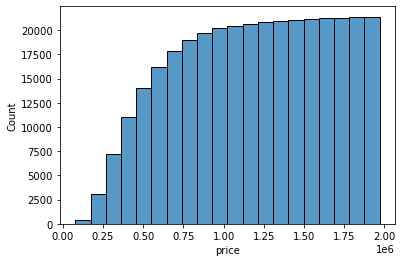

In [226]:
sns.histplot(df['price'].sort_values()[:-216], cumulative=True, bins=20)

<AxesSubplot:xlabel='price', ylabel='Count'>

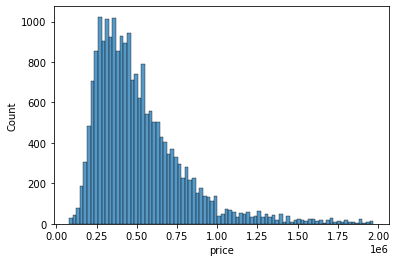

In [228]:
sns.histplot(df['price'].sort_values()[:-216])

<AxesSubplot:xlabel='price', ylabel='Count'>

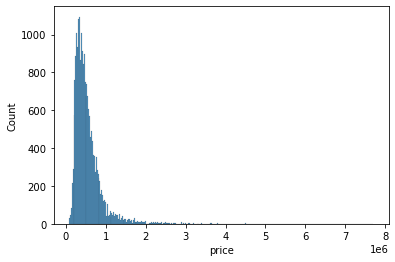

In [210]:
sns.histplot(df['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

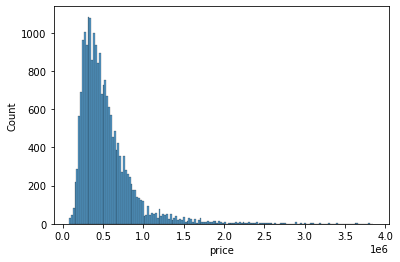

In [211]:
sns.histplot(df[df['price'] < 4e+06]['price'])

<AxesSubplot:xlabel='price', ylabel='Count'>

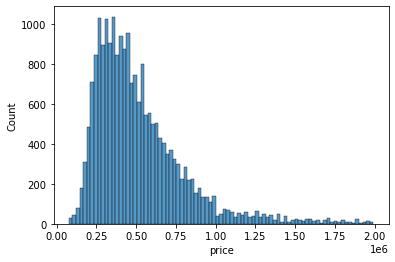

In [212]:
sns.histplot(df[df['price'] < 2e+06]['price'])

In [213]:
#We could maybe even cut it off at $1m but that would probably greatly reduces usability of the model.

In [218]:
100*df[df['price'] < 1e+06]['price'].count()/df['price'].count()

93.10089364263555

In [216]:
100*df[df['price'] < 2e+06]['price'].count()/df['price'].count()

99.03690327360282

In [217]:
100*df[df['price'] < 4e+06]['price'].count()/df['price'].count()

99.94443672732324

In [229]:
#Hmm not really, models fit unto data with cutoffs at either 1,2 or 4 would still describe over 90 or even 99% of data.

In [ ]:
#Time to train 2 different models based on cutoff point. First gotta learn how to compare models.